### Loading the Data

In [42]:
import pandas as pd

In [43]:
df = None

# Attempting to load a CSV file from a Google Drive link into a Pandas DataFrame.
try:
    # Original URL pointing to Google Drive file shared for viewing.
    url = 'https://drive.google.com/file/d/1xx0EV_nLt9shUSFJ7u5qAeeDrinZRnxf/view?usp=sharing'

    # Extracting file ID from the original URL to construct a direct download link.
    url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

    # Loading the CSV data from the constructed URL into a Pandas DataFrame.
    df = pd.read_csv(url)

    # Confirmation message upon successful loading of CSV data.
    print('Csv and Dataframe loaded.')

except Exception as e:
    # Handling any exceptions that may occur during the process and printing the error message.
    print('Exception occurred: ', str(e))


Csv and Dataframe loaded.


In [44]:
# exploring the dataset
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [45]:
# verifying the rows and columns in the dataset
df.shape

(16734, 19)

In [46]:
# verifying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

#### Checking for missing values

In [47]:
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

### Handling missing Values

In [48]:
# filling missing values 

for column in df.columns:
    if df[column].dtype == 'object':
        # For string columns, fill missing values with mode
        mode_value = df[column].mode().iloc[0]  # Get the mode value as a scalar
        df[column].fillna(mode_value, inplace=True)
    else:
        # For numeric columns, fill missing values with mean
        df[column].fillna(df[column].mean(), inplace=True)

In [49]:
# confirming that missing values does not exist in the dataframe

df.isna().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [50]:
# Replace specific values in the 'Price' and 'Kilometres' columns of the DataFrame.

# Replace 'POA' (Price on Application) with 0 in the 'Price' column.
df['Price'] = df['Price'].replace('POA', 0)

# Replace '-' (dash) with 0 in the 'Kilometres' column.
df['Kilometres'] = df['Kilometres'].replace('-', 0)


In [51]:
# Convert specified columns to integers, handling errors gracefully.

# Convert 'Kilometres' column to numeric, coercing errors to NaN, filling NaN with 0, and converting to integer.
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce').fillna(0).astype(int)

# Convert 'Price' column to numeric, coercing errors to NaN, filling NaN with 0, and converting to integer.
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

# Verify the data types of 'Kilometres' and 'Price' columns after conversion.
df[['Kilometres', 'Price']].dtypes


Kilometres    int64
Price         int64
dtype: object

In [52]:
# Define functions to calculate quartiles and inter-quartile range (IQR)
def q1(series):
    """Calculate the first quartile (Q1)."""
    return series.quantile(0.25)


def q3(series):
    """Calculate the third quartile (Q3)."""
    return series.quantile(0.75)


def iqr(series):
    """Calculate the interquartile range (IQR)."""
    return q3(series) - q1(series)


def lower_outlier(series):
    """Calculate the lower outlier bound."""
    return (q1(series) - 1.5 * iqr(series)).round(2)


def upper_outlier(series):
    """Calculate the upper outlier bound."""
    return q3(series) + 1.5 * iqr(series)


def data_range(series):
    """Calculate the range of the data."""
    return series.max() - series.min()


def mode(series):
    """Calculate the mode of the data."""
    return series.mode()[0]


# Define a list of calculations to apply to each column
calculations = [
    "min",  # Minimum value
    "max",  # Maximum value
    "count",  # Count of non-null values
    "mean",  # Mean value
    "median",  # Median value
    lambda x: x.mode()[0],  # Mode value
    data_range,  # Range of the data
    q1,  # First quartile (Q1)
    q3,  # Third quartile (Q3)
    iqr,  # Inter-quartile range (IQR)
    "var",  # Sample Variance
    "std",  # Sample Standard deviation
    lower_outlier,  # Lower outlier bound
    upper_outlier  # Upper outlier bound
]

# Apply the calculations to each column in the dataframe (df)
result = df.agg(
    {
        "Price": calculations,  # Apply calculations to the 'Price' column
        "Kilometres": calculations  # Apply calculations to the 'Kilometres' column
    }
)

# Rename the 'mode' and 'range' rows for clarity
result.rename(index={result.index[5]: 'mode'}, inplace=True)  # Rename mode row
result.rename(index={result.index[6]: 'range'}, inplace=True)  # Rename range row
result.rename(index={result.index[-3]: 'variance'}, inplace=True)  # Rename range row
result.rename(index={result.index[-4]: 'standard deviation'}, inplace=True)  # Rename range row


# Define a function to format large numbers
def format_large_numbers(x):
    if abs(x) >= 1e6:
        return f'{x:.2e}'  # Scientific notation for numbers >= 1 million
    else:
        return f'{x:.2f}'  # Normal formatting for smaller numbers


# Apply formatting to each cell in the DataFrame
result = result.applymap(format_large_numbers)

# Display the resulting dataframe
print(result)

                        Price  Kilometres
min                      0.00        0.00
max                  1.50e+06   533849.00
count                16734.00    16734.00
mean                 37190.56    96555.00
median               29300.00    82352.00
mode                 29990.00        0.00
range                1.50e+06   533849.00
q1                   18990.00    34807.00
q3                   43990.00   143738.00
iqr                  25000.00   108931.00
standard deviation   1.38e+09    6.24e+09
variance             37174.87    79011.38
lower_outlier       -18510.00  -128589.50
upper_outlier        81490.00   307134.50


### Diagrams

In [53]:
df[["Price", "Kilometres"]].head()

,Price,Kilometres
0,51990,5595
1,19990,16
2,108988,8472
3,32990,136517
4,34990,1035


#### Box plot for Price and Kilometres

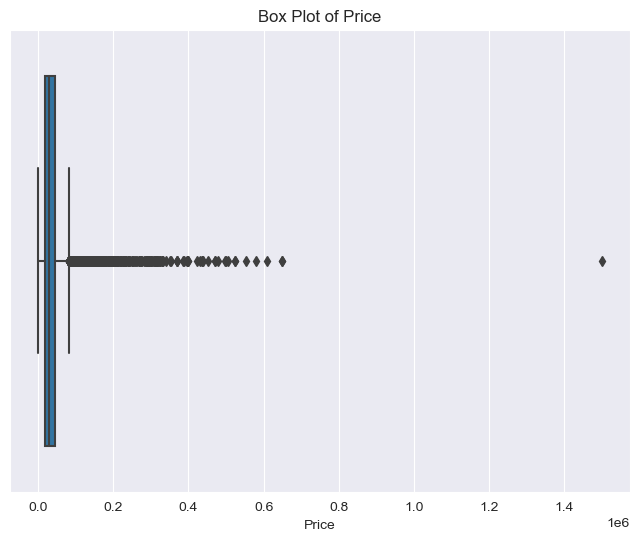

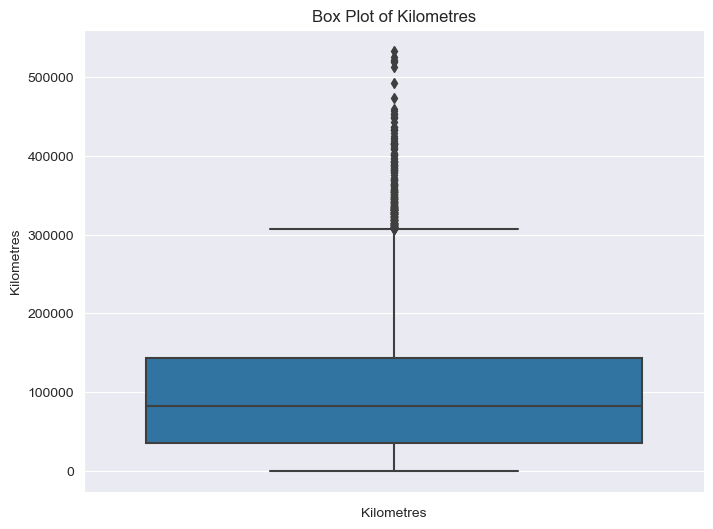

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Price'
plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
sns.boxplot(x='Price', data=df)  # Create a box plot for the 'Price' column
plt.title('Box Plot of Price')  # Set the title of the plot
plt.xlabel('Price')  # Set the label for the x-axis
plt.show()  # Display the plot

# Box plot for 'Kilometres'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Kilometres', data=df)
plt.title('Box Plot of Kilometres')
plt.xlabel('Kilometres')
plt.show()


#### Standard deviation visualization for Price and Kilometres

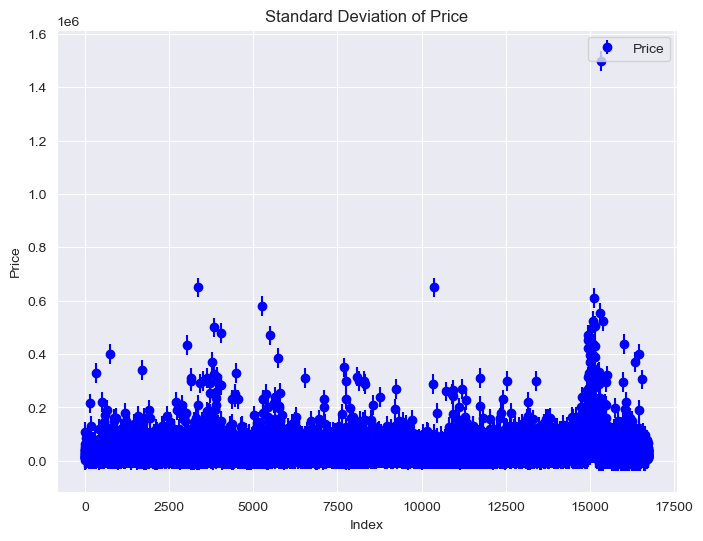

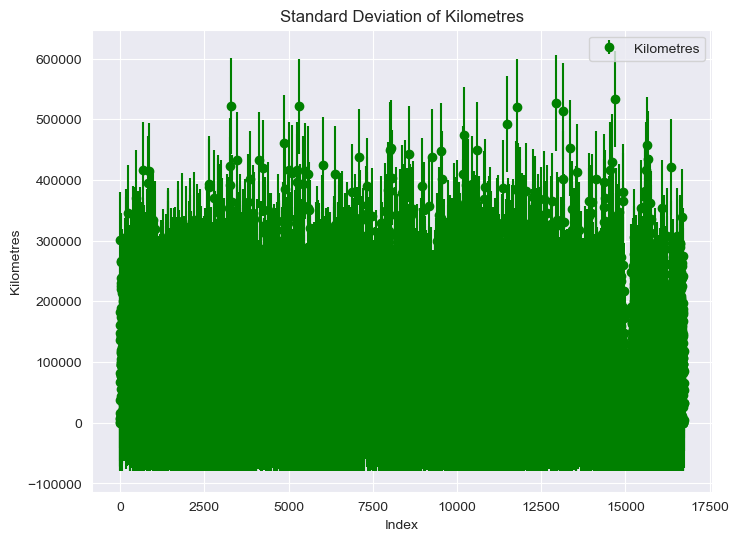

In [55]:
# Standard deviation visualization for 'Price'
plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches

# Plotting error bars for 'Price'
plt.errorbar(x=df.index,  # X-axis values
             y=df['Price'],  # Y-axis values (Price data)
             yerr=df['Price'].std(),  # Error bars using standard deviation of Price
             fmt='o',  # Marker style (circle markers)
             color='blue',  # Marker color
             label='Price')  # Legend label for Price

plt.title('Standard Deviation of Price')  # Set the title of the plot
plt.xlabel('Index')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis
plt.legend()  # Display legend
plt.show()  # Display the plot

# Standard deviation visualization for 'Kilometres'
plt.figure(figsize=(8, 6))

# Plotting error bars for 'Kilometres'
plt.errorbar(x=df.index,
             y=df['Kilometres'],
             yerr=df['Kilometres'].std(),
             fmt='o',
             color='green',
             label='Kilometres')

plt.title('Standard Deviation of Kilometres')
plt.xlabel('Index')
plt.ylabel('Kilometres')
plt.legend()
plt.show()

#### Linear regression visualization for Price and Kilometres

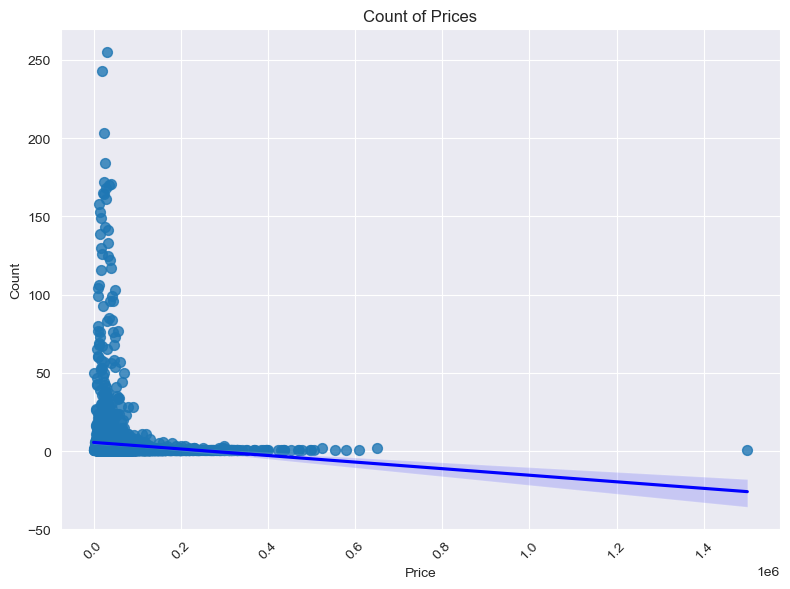

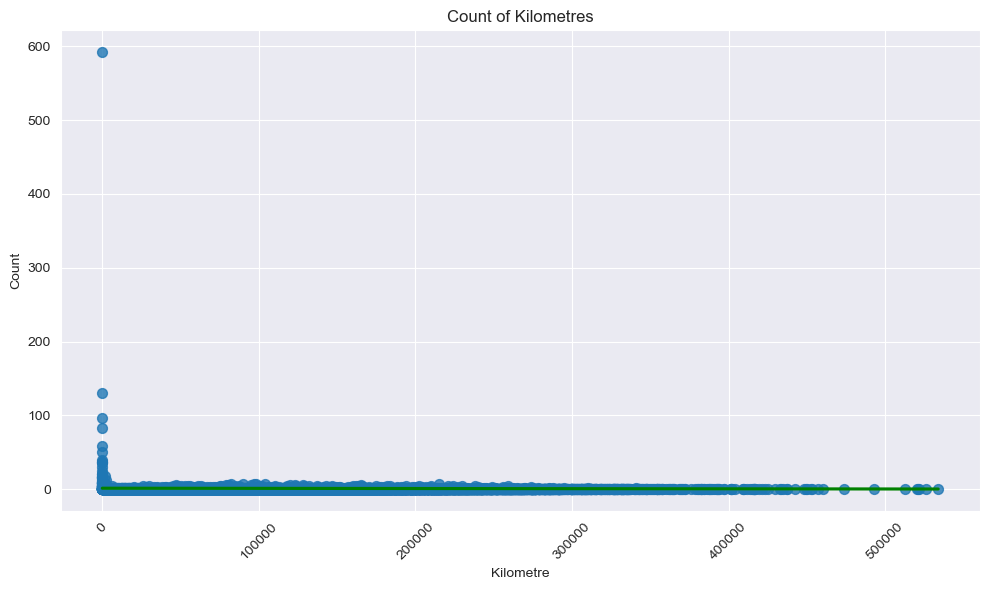

In [56]:
# Linear regression visualization
plt.figure(figsize=(8, 6))

# Price vs count of Price

# Calculate the count of each Price value and sort by index
price_counts = df['Price'].value_counts().sort_index()

sns.regplot(x=price_counts.index, y=price_counts.values, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Count of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kilometre vs count of Kilometre
plt.figure(figsize=(10, 6))
kilometre_counts = df['Kilometres'].value_counts().sort_index()
sns.regplot(x=kilometre_counts.index, y=kilometre_counts.values, scatter_kws={'s': 50}, line_kws={'color': 'green'})
plt.title('Count of Kilometres')
plt.xlabel('Kilometre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


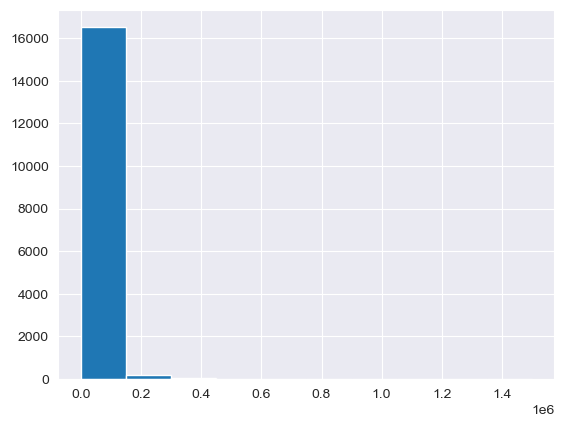

Skewness: 0.9683141772242011


In [57]:
df['Price'].hist()
plt.show()
print(f'Skewness: {df["Kilometres"].skew()}')

This show that Price is rightly skewed

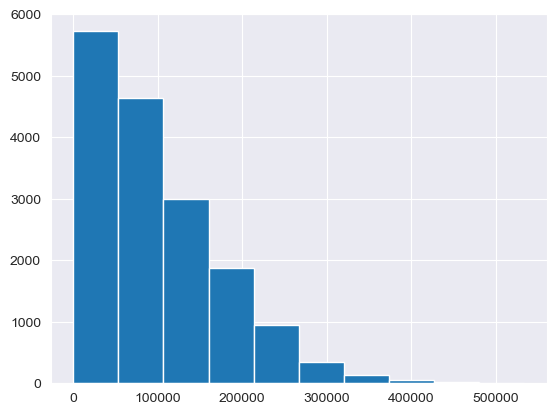

Skewness: 0.9683141772242011


In [58]:
df['Kilometres'].hist()
plt.show()
print(f'Skewness: {df["Kilometres"].skew()}')

This show that Kilometer is rightly skewed